In [88]:
import os
import matplotlib.pyplot as plt

In [105]:
data_dir  = '../dataset0/augmented_2/train'

In [106]:
labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
# labels = ['neutral']

In [107]:
emotion_counts = {label: 0 for label in labels}

for label in labels:
    label_dir = os.path.join(data_dir, label)
    num_images = len(os.listdir(label_dir))
    emotion_counts[label] = num_images

In [108]:
print (emotion_counts)

{'anger': 10000, 'contempt': 8188, 'disgust': 8547, 'fear': 9992, 'happiness': 10000, 'neutral': 10000, 'sadness': 10000, 'surprise': 10000}


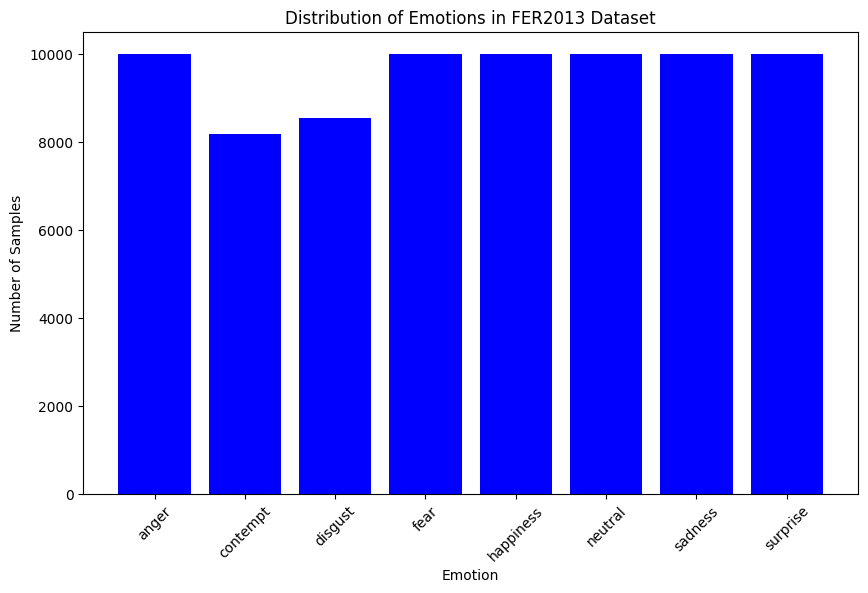

In [109]:
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='blue')
plt.title('Distribution of Emotions in FER2013 Dataset')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()